In [1]:
import pandas as pd
import numpy as np

cast_df = pd.read_csv(r'./cast.csv')

# Section 1

## Question 1

In [2]:
def deminal_to_all_bases(num):
    if (not isinstance(num, int)):
        print("This is not a number")
        return
    
    print(f"this is the number is binary base {bin(num)}")
    print(f"this is the number is hexadecimal base {hex(num)}")
    print(f"this is the number is octal base {oct(num)}")

deminal_to_all_bases(12)

this is the number is binary base 0b1100
this is the number is hexadecimal base 0xc
this is the number is octal base 0o14


## Question 2

In [3]:
cast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333695 entries, 0 to 3333694
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 152.6+ MB


In [4]:
cast_df.head(10)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9.0


--------------

# Section 2

## Question 1
There are 2 version for the answer since I wasn't sure about the contains or equals 

In [5]:
title_has_hamlet = cast_df.loc[cast_df["title"].str.contains("Hamlet")][["title","year"]]

hamlet_movies_count = title_has_hamlet.drop_duplicates().groupby(["year"])["title"].value_counts().count()

hamlet_movies_count


49

In [6]:
title_has_hamlet = cast_df.loc[cast_df["title"]=="Hamlet"][["title","year"]]

hamlet_movies_count = title_has_hamlet.drop_duplicates().groupby(["year"])["title"].value_counts().count()

hamlet_movies_count


17

## Question 2
There are 2 version for the answer since I wasn't sure about the contains or equals 

In [7]:
treasure_island_movies = cast_df.loc[cast_df["title"].str.contains("Treasure Island")]


treasure_island_movies_grouped = treasure_island_movies.groupby("title")

treasure_island_movies.groupby(['year','title']).sum().reset_index()[["year","title"]]

,year,title
0,1918,Treasure Island
1,1920,Treasure Island
2,1934,Treasure Island
3,1938,The Secret of Treasure Island
4,1939,Charlie Chan at Treasure Island
5,1950,Treasure Island
6,1954,Return to Treasure Island
7,1957,Five on a Treasure Island
8,1972,Treasure Island
9,1973,Treasure Island


In [8]:
treasure_island_movies = cast_df.loc[cast_df["title"]=="Treasure Island"]


treasure_island_movies_grouped = treasure_island_movies.groupby("title")

treasure_island_movies.groupby(['year','title']).sum().reset_index()[["year","title"]]

,year,title
0,1918,Treasure Island
1,1920,Treasure Island
2,1934,Treasure Island
3,1950,Treasure Island
4,1972,Treasure Island
5,1973,Treasure Island
6,1985,Treasure Island
7,1999,Treasure Island


## Question 3

In [9]:
filtered_hamlet = cast_df.loc[(cast_df["title"].str.contains("Hamlet")) & (cast_df["year"] == 1921)]

len(filtered_hamlet["character"].unique())

9

In [10]:
len(cast_df.query('year ==1921 & title.str.contains("Hamlet").values')["character"].unique())

9

## Question 4
There are 2 version for the answer since I wasn't sure about the contains or equals 

<AxesSubplot:xlabel='decade'>

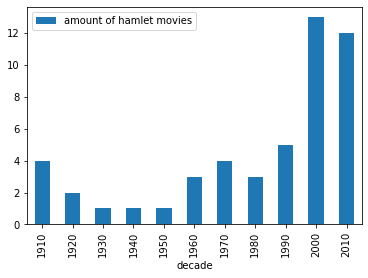

In [11]:

hamlet_movies = cast_df.loc[cast_df["title"].str.contains("Hamlet")][["title","year"]]

hamlet_movies_by_decade = hamlet_movies.drop_duplicates().groupby([(hamlet_movies.year //10) * 10])

aggregated_movies = hamlet_movies_by_decade["title"].value_counts().to_frame().groupby("year").sum()
aggregated_movies.reset_index().rename(columns={'title' : 'amount of hamlet movies', 'year':'decade'}).plot.bar(x='decade',y='amount of hamlet movies')


<AxesSubplot:xlabel='decade'>

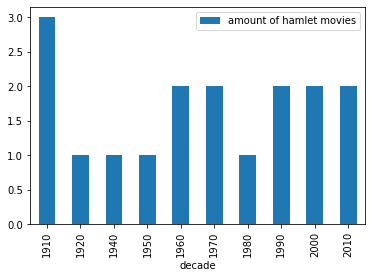

In [12]:
hamlet_movies = cast_df.loc[cast_df["title"]=="Hamlet"][["title","year"]]

hamlet_movies_by_decade = hamlet_movies.drop_duplicates().groupby([(hamlet_movies.year //10) * 10])

aggregated_movies = hamlet_movies_by_decade["title"].value_counts().to_frame().groupby("year").sum()
aggregated_movies.reset_index().rename(columns={'title' : 'amount of hamlet movies', 'year':'decade'}).plot.bar(x='decade',y='amount of hamlet movies')


## Question 5

In [13]:
filtered_to_fifties = cast_df.loc[(cast_df["year"]<1960) & (cast_df["year"]>=1950)]
filtered_to_fifties.loc[filtered_to_fifties["n"]==1].groupby(["year","n","type"]).size()


year  n    type   
1950  1.0  actor      604
           actress    271
1951  1.0  actor      633
           actress    272
1952  1.0  actor      591
           actress    284
1953  1.0  actor      634
           actress    290
1954  1.0  actor      626
           actress    298
1955  1.0  actor      606
           actress    264
1956  1.0  actor      614
           actress    288
1957  1.0  actor      708
           actress    284
1958  1.0  actor      694
           actress    275
1959  1.0  actor      678
           actress    287
dtype: int64

## Question 6

In [14]:
filtered_since_nineties = cast_df.loc[(cast_df["year"]>1990) & (cast_df["n"]==1)]
                                      
roles_per_actor_series = filtered_since_nineties.groupby("name")["n"].value_counts()

roles_per_actor_frame = roles_per_actor_series.to_frame().rename(columns={'name':'actor_name','n':'roles'}).reset_index()

print(roles_per_actor_frame.sort_values(by=['roles'],ascending=False).head(10))

                     name    n  roles
24175            Mohanlal  1.0    116
21058           Mammootty  1.0    105
666          Akshay Kumar  1.0     87
14773             Jayaram  1.0     74
611            Ajay Devgn  1.0     69
2195             Andy Lau  1.0     68
10113        Eric Roberts  1.0     67
1661     Amitabh Bachchan  1.0     66
24493  Nagarjuna Akkineni  1.0     59
8793                Dilip  1.0     59


## Question 7

In [15]:
filtered_to_frank = cast_df.loc[cast_df["name"]=="Frank Oz"]

grouped_frank_films = filtered_to_frank.groupby(["title", "year"])["name"].value_counts().to_frame()

roles_per_film = grouped_frank_films.rename(columns={'name':'number_of_roles','year':'movie_year', "title":"movie_title"}).reset_index()

roles_per_film.loc[roles_per_film["number_of_roles"] >1].sort_values(by=['year'])

,title,year,name,number_of_roles
21,The Muppet Movie,1979,Frank Oz,8
0,An American Werewolf in London,1981,Frank Oz,2
19,The Great Muppet Caper,1981,Frank Oz,6
18,The Dark Crystal,1982,Frank Oz,2
22,The Muppets Take Manhattan,1984,Frank Oz,7
8,Sesame Street Presents: Follow that Bird,1985,Frank Oz,3
20,The Muppet Christmas Carol,1992,Frank Oz,7
6,Muppet Treasure Island,1996,Frank Oz,4
7,Muppets from Space,1999,Frank Oz,4
16,The Adventures of Elmo in Grouchland,1999,Frank Oz,3
